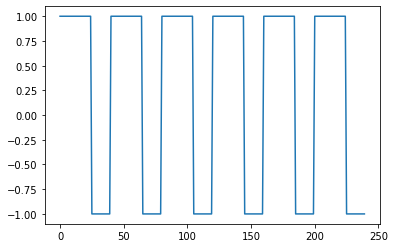

In [22]:
# Question 1.1 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
ONES_DURATION = [15, 20, 25, 15, 20, 25]
N = 240
NUM_SOURCES = 6
TC = []
COLUMN_NAMES = ['TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6']

for vector_num in range(NUM_SOURCES):
    vector = []
    index = 0
    # adding in 0s while incrementing to arrival 
    while index < AV[vector_num]:
        vector.append(0)
        index += 1
    one_count = 0
    inc_count = 0
    while index < N:
        # resetting counts if an increment has been completed
        if inc_count >= IV[vector_num]:
            inc_count = 0
            one_count = 0
        if one_count < ONES_DURATION[vector_num]:
            vector.append(1)
            one_count += 1
        else:
            vector.append(-1)
        # incrementing counters 
        inc_count += 1
        index += 1   
    # plotting time course
    plt.clf()
    plt.plot(range(len(vector)), vector)
    plt.savefig('../1.1_TC_' + str(vector_num + 1) + '.jpeg')
    # mean subtraction followed by division by std dev
    vector = [x - np.mean(vector) for x in vector]
    vector = [x / np.std(vector) for x in vector]

    TC.append(vector)

# check matrix 
def check_vector(vector):
    prev_value = vector[0]
    count = 0
    print_list = []
    for val in vector:
        if val == prev_value:
            count += 1
        else:
            print_list.append([count, prev_value])
            count = 1
            prev_value = val
    print(print_list)

# rotating matrix so that a df can be made with dimensions 240 x 6 
TC  = zip(*reversed(TC))
TC_df = pd.DataFrame(TC, columns = COLUMN_NAMES)

([<matplotlib.axis.YTick at 0x7efd7be32b50>,
 [Text(0, 0, 'TC1'),
  Text(0, 1, 'TC2'),
  Text(0, 2, 'TC3'),
  Text(0, 3, 'TC4'),
  Text(0, 4, 'TC5'),
  Text(0, 5, 'TC6')])

<Figure size 432x288 with 0 Axes>

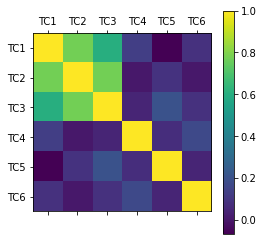

In [34]:
#Question 1.2
plt.clf()
plt.matshow(TC_df.corr())
plt.colorbar()
ticks = [i for i in range(len(TC_df.columns))]
plt.xticks(ticks, TC_df.columns)
plt.yticks(ticks, TC_df.columns)

In [ ]:
# Question 1.3
